<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/cv_with_dl/7_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning

**학습 목표**

* Transfer learning의 목적을 설명할 수 있습니다.
* 처음부터 모델을 학습하는 것과 학습된 모델을 이용하는 것에 대한 특징을 통해 Transfer Learning의 개념과 효과를 알아봅시다.
* Transfer Learning을 적용할 때 어떤 것을 고려해야 하는지, 어떻게 적절하게 적용할 수 있을지에 대한 것을 알아봅시다.

**Q. ImageNet Competition의 결과를 보며 알게 된 특징과 오분류율에 비해 파라미터 수가 어떻게 되었는지 설명해 보세요.**
```
2012년을 기점으로, 딥러닝 기반 모델들이 ImageNet competition에서 좋은 결과를 얻었습니다. ImageNet competition에서 처음으로 우승했던 딥러닝 기반 모델인 AlexNet(2012)에는 8개의 레이어가 있었습니다. 또한, VGG(19개), GoogleNet(22개)을 거쳐서, 2015년의 ResNet에는 152개의 레이어가 있습니다. 오분류율이 감소함과 동시에, 연산해야 하는 파라미터의 수가 급격하게 증가했습니다.
```

**Q. Training from scratch와 Transfer Learnin은 각 어떤 방법이고 어떤 특징이 있는지 설명해 보세요.**
```
training from scratch: 처음부터 모델을 만들고 가중치를 무작위로 초기화한 다음 데이터로부터 학습시키는 방법, 모델이 데이터에 대해 완전히 새로운 표현을 학습해야 하기 때문에 데이터가 많고 모델이 복잡한 경우 시간과 컴퓨팅 리소스를 많이 소비.

transfer learning:이미 학습된 모델의 가중치를 가져와서 이를 새로운 작업에 맞게 조정하는 방법, 작은 데이터셋에서도 잘 작동하며, 훈련 시간과 컴퓨팅 리소스를 절약.
```

**Q. Transfer Learning을 사용했을 때 효과는 어떤 것이 있는지 설명해 보세요.**
```
기존에 만들어진(학습된) 모델을 사용하여 새로운 모델을 만들 때, 학습을 빠르게 하며 예측 능력을 더 높일 수 있습니다. 또한, 복잡한 모델일수록 학습시키기 어렵다는 난점을 해결할 수 있으며 학습에 들어가는 연산 비용을 절감할 수 있습니다.
```

**Q. input과 가까운 레이어와 input과 멀어지는 레이어는 각각 어떤 부분이 학습되는지 설명해 보세요.**
```
input과 가까운 레이어에서는 이미지의 단순하고 일반적인 패턴을 인식하는 filter들이 학습됩니다. 레이어가 input과 멀어질수록 복잡하고 task(domain)-specific 한 특성들이 학습됩니다.
```

**Q. VGG16 모델을 학습할 때 데이터셋의 사이즈에 따라서 어떻게 모델을 학습하면 좋을지 설명해 보세요.**
```
만약 가지고 있는 데이터셋의 사이즈가 충분히 크다면 VGG16 모델 전체를 학습시킵니다. 반면에 데이터셋의 사이즈가 작다면 feature extractor 부분의 파라미터를 고정(freeze) 시키고, 내가 가진 task 또는 데이터와 관계되는 일부 layer 부분만 학습시킵니다. 마지막으로 데이터셋의 사이즈가 중간 정도라면 freeze 하는 부분을 줄여서 학습시킵니다.
```

**Q. 데이터셋의 유사성과 데이터셋의 사이즈에 따라서 학습방법이 각각 어떻게 달라지는지 설명해 보세요.**
```
상황에 따라서 크게 4가지로 나눌 수 있습니다. 각 학습방법에 대해서 영상과 이미지를 참고해서 잘 작성하셨다고 믿습니다! 조금 헷갈리신 분들은 다시 영상을 참고하셔서 복습해 보세요. 한 줄로 요약하자면 가지고 있는 데이터셋의 크기가 작을수록, pre-training을 진행한 데이터셋과의 유사성(domain의 유사성)이 높을수록 많은 레이어를 freeze 하는 것이 효과적입니다.
```

**Q. Transfer learning의 목적에 대해서 설명해 보세요.**
```
Transfer learning은 데이터의 양과 연산 비용의 한계를 극복하면서 딥러닝 구조의 장점을 이용하기 위해서 고안되었습니다.
```

**Q. Transfer learning을 적용함에 있어서 어떤 기준으로 적용을 해야 하는지 설명해 보세요.**
```
Domain의 유사성과 가지고 있는 Dataset의 size입니다. Transfer learning을 적절하게 사용하기 위해서는 Pretrained model에서 어느 정도를 더 학습할지를 판단할 수 있어야 합니다.
```

### ResNet50 Transfer Learning

In [ ]:
!mkdir -p aiffel/cifar_10_small

!ln -s ~/data/cifar_10_small/train/ aiffel/cifar_10_small/train
!ln -s ~/data/cifar_10_small/test/ aiffel/cifar_10_small/test

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_dir='aiffel/cifar_10_small/train'
test_dir='aiffel/cifar_10_small/test'

train_aeroplane_dir= os.path.join(train_dir,'aeroplane')
train_bird_dir=os.path.join(train_dir,'bird')
train_car_dir= os.path.join(train_dir,'car')
train_cat_dir=os.path.join(train_dir,'cat')

test_aeroplane_dir= os.path.join(test_dir,'aeroplane')
test_bird_dir=os.path.join(test_dir,'bird')
test_car_dir= os.path.join(test_dir,'car')
test_cat_dir=os.path.join(test_dir,'cat')

In [ ]:
# 훈련용 데이터셋의 이미지 개수 출력

print('훈련용 aeroplane 이미지 전체 개수:', len(os.listdir(train_aeroplane_dir)))
print('훈련용 bird 이미지 전체 개수:', len(os.listdir(train_bird_dir)))
print('훈련용 car 이미지 전체 개수:', len(os.listdir(train_car_dir)))
print('훈련용 cat 이미지 전체 개수:', len(os.listdir(train_cat_dir)))

훈련용 aeroplane 이미지 전체 개수: 5000
훈련용 bird 이미지 전체 개수: 5000
훈련용 car 이미지 전체 개수: 5000
훈련용 cat 이미지 전체 개수: 5000


In [ ]:
# Q. 테스트용 데이터셋의 이미지 개수를 각 디렉토리별로 출력해 보세요.

print('테스트용 aeroplane 이미지 전체 개수:', len(os.listdir(test_aeroplane_dir)))
print('테스트용 bird 이미지 전체 개수:', len(os.listdir(test_bird_dir)))
print('테스트용 car 이미지 전체 개수:', len(os.listdir(test_car_dir)))
print('테스트용 cat 이미지 전체 개수:', len(os.listdir(test_cat_dir)))

테스트용 aeroplane 이미지 전체 개수: 1000
테스트용 bird 이미지 전체 개수: 1000
테스트용 car 이미지 전체 개수: 1000
테스트용 cat 이미지 전체 개수: 1000


**데이터 파이프 라인 생성하기**

데이터를 디렉토리로부터 불러올 때 한번에 가져올 데이터의 수인 batch size를 설정하고, data generator를 생성하여 데이터를 모델에 넣을 수 있도록 합니다. 우선 ImageDataGenerator 객체를 생성하여 데이터 파이프 라인을 만듭니다. train dataset의 generator에는 augmentation이 포함되고, test dataset의 generator는 원본 상태를 유지하고 rescaling만 적용합니다.

In [ ]:
# data 파이프 라인 생성

# 데이터를 디렉토리로부터 불러올 때, 한번에 가져올 데이터의 수
batch_size=20

# Training 데이터의 augmentation 파이프 라인 만들기
augmentation_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1./255,  # 모든 데이터의 값을 1/255로 스케일 조정
                                    rotation_range=40,  # 0~40도 사이로 이미지 회전
                                    width_shift_range=0.2,  # 전체 가로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    height_shift_range=0.2,   # 전체 세로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    shear_range=0.2,  # 0.2 라디안 정도까지 이미지를 기울이기
                                    zoom_range=0.2, # 확대와 축소의 범위 [1-0.2 ~ 1+0.2 ]
                                    horizontal_flip=True,)  # 수평 기준 플립을 할 지, 하지 않을 지를 결정

# Test 데이터의 augmentation 파이프 라인 만들기
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Augmentation 파이프라인을 기준으로 디렉토리로부터 데이터를 불러오는 모듈을 만듭니다. train/test dataset의 경로와 이미지 크기 등을 지정하여 train_generator와 test_generator 생성하면 됩니다.

In [ ]:
# Augmentation 파이프라인을 기준으로 디렉토리로부터 데이터를 불러 오는 모듈 만들기

train_generator = augmentation_train_datagen.flow_from_directory(
        directory=train_dir, #  어느 디렉터리에서 이미지 데이터를 가져올 것인가?
        target_size=(150, 150), # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size, # 디렉토리에서 batch size만큼의 이미지를 가져옵니다.
        interpolation='bilinear',  # resize를 할 때, interpolatrion 기법을 결정합니다.
        color_mode ='rgb',
        shuffle='True', # 이미지를 셔플링할 지 하지 않을 지를 결정.
        class_mode='categorical') # multiclass의 경우이므로 class mode는 categorical

print(train_generator.class_indices)

Found 20000 images belonging to 4 classes.
{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}


In [ ]:
# Q. Test 데이터 디렉토리로부터 이미지를 불러오는 파이프라인을 완성해 보세요.
# (위의 train_generator와 조건은 동일)

test_generator = test_datagen.flow_from_directory(
        directory=train_dir, #  어느 디렉터리에서 이미지 데이터를 가져올 것인가?
        target_size=(150, 150), # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size, # 디렉토리에서 batch size만큼의 이미지를 가져옵니다.
        interpolation='bilinear',  # resize를 할 때, interpolatrion 기법을 결정합니다.
        color_mode ='rgb',
        shuffle='True', # 이미지를 셔플링할 지 하지 않을 지를 결정.
        class_mode='categorical')

print(train_generator.class_indices)

Found 20000 images belonging to 4 classes.
{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}


In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 4)


In [ ]:
# back bone

conv_base=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# 최종 모델 구성하기

input_layer = tf.keras.layers.Input(shape=(150,150,3))
x = conv_base(input_layer) # 위에서 불러온 pretrained model을 활용하기

# 불러온 conv_base 모델의 최종 결과물은 Conv2D 연산의 feature map과 동일
# 따라서 최종적인 Multiclass classfication을 하기 위해서는 Flatten을 해야 한다.

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(4, activation='softmax')(x)

conv_base는 freeze 시킴으로써 이미 학습된 파라미터 값을 그대로 사용합니다.

In [ ]:
conv_base.trainable = False

In [ ]:
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 49,804,676
Trainable params: 26,216,964
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
loss_function=tf.keras.losses.categorical_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

data generator는 입력 데이터와 타겟(라벨)의 batch를 끝없이 반환합니다. batch가 끝없이 생성되기 때문에, 한 번의 epoch에 generator로부터 얼마나 많은 샘플을 뽑을지 모델에 전달해야 합니다. 만약 batch_size=20이고 steps_per_epoch=100일 경우 (데이터, 라벨)의 쌍 20개가 생성되고, 크기가 20인 batch 데이터를 100번 학습하면 1 epoch이 완료됩니다. 단, 크기 20의 batch 데이터는 매번 랜덤으로 생성됩니다. 일반적으로 (전체 데이터 길이/batch_size)를 steps_per_epoch으로 설정합니다.

In [ ]:
history = model.fit(
      train_generator,
     steps_per_epoch=(len(os.listdir(train_aeroplane_dir)) + len(os.listdir(train_bird_dir)) + len(
       os.listdir(train_car_dir)) + len(os.listdir(train_cat_dir))) // batch_size,
      epochs=20,
      validation_data=test_generator,
      validation_freq=1)

Epoch 1/20
1000/1000 [==============================] - 158s 158ms/step - loss: 1.2163 - categorical_accuracy: 0.4512 - val_loss: 1.0876 - val_categorical_accuracy: 0.5108
Epoch 3/20
1000/1000 [==============================] - 156s 156ms/step - loss: 1.1650 - categorical_accuracy: 0.4811 - val_loss: 1.0050 - val_categorical_accuracy: 0.5830
Epoch 4/20
1000/1000 [==============================] - 155s 155ms/step - loss: 1.1450 - categorical_accuracy: 0.4943 - val_loss: 1.0338 - val_categorical_accuracy: 0.5732
Epoch 5/20
1000/1000 [==============================] - 155s 155ms/step - loss: 1.1275 - categorical_accuracy: 0.5065 - val_loss: 0.9736 - val_categorical_accuracy: 0.6074
Epoch 6/20
1000/1000 [==============================] - 157s 157ms/step - loss: 1.1117 - categorical_accuracy: 0.5143 - val_loss: 1.0497 - val_categorical_accuracy: 0.5438
Epoch 7/20
1000/1000 [==============================] - 159s 159ms/step - loss: 1.1110 - categorical_accuracy: 0.5145 - val_loss: 0.9604 - v

In [ ]:
model.save('/aiffel/aiffel/cifar_10_small/multi_classification_augumentation_model.hdf5')

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


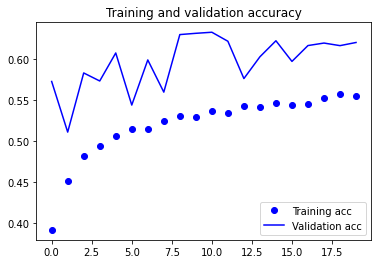

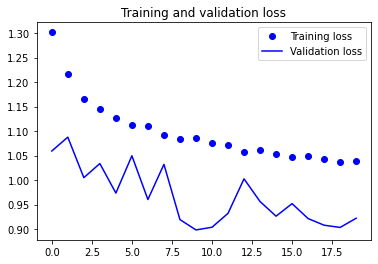

In [ ]:
# 시각화

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()